In [3]:
import pyopencl as cl
import deviceinfo
import numpy as np
from PIL import Image
from matplotlib.pyplot import imshow
import torchvision.transforms as transforms
from time import time
PYOPENCL_COMPILER_OUTPUT=1

## Load the model parameters into numpy arrays

In [2]:
t = time()
#CONV 0
fp = open('../model/0_conv_weights_padded.txt', "rb")
conv0_weights = np.loadtxt(fp, dtype='float32')
fp = open('../model/0_conv_biases.txt', "rb")

bn0_biases = np.loadtxt(fp, dtype='float32') 
fp = open('../model/0_conv_normalize.txt', "rb")
bn0_weights = np.loadtxt(fp, dtype='float32',delimiter=',',usecols=0)
fp = open('../model/0_conv_normalize.txt', "rb")
bn0_mean = np.loadtxt(fp, dtype='float32',delimiter=',',usecols=1)
fp = open('../model/0_conv_normalize.txt', "rb")
bn0_var = np.loadtxt(fp, dtype='float32',delimiter=',',usecols=2)

#CONV 2
fp = open('../model/2_conv_weights.txt', "rb")
conv2_weights = np.loadtxt(fp, dtype='float32')
fp = open('../model/2_conv_biases.txt', "rb")
bn2_biases = np.loadtxt(fp, dtype='float32')
fp = open('../model/2_conv_normalize.txt', "rb")
bn2_weights = np.loadtxt(fp, dtype='float32',delimiter=',',usecols=0)
fp = open('../model/2_conv_normalize.txt', "rb")
bn2_mean = np.loadtxt(fp, dtype='float32',delimiter=',',usecols=1)
fp = open('../model/2_conv_normalize.txt', "rb")
bn2_var = np.loadtxt(fp, dtype='float32',delimiter=',',usecols=2)

#CONV 4
fp = open('../model/4_conv_weights.txt', "rb")
conv4_weights = np.loadtxt(fp, dtype='float32')
fp = open('../model/4_conv_biases.txt', "rb")
bn4_biases = np.loadtxt(fp, dtype='float32')
fp = open('../model/4_conv_normalize.txt', "rb")
bn4_weights = np.loadtxt(fp, dtype='float32',delimiter=',',usecols=0)
fp = open('../model/4_conv_normalize.txt', "rb")
bn4_mean = np.loadtxt(fp, dtype='float32',delimiter=',',usecols=1)
fp = open('../model/4_conv_normalize.txt', "rb")
bn4_var = np.loadtxt(fp, dtype='float32',delimiter=',',usecols=2)

#CONV 6
fp = open('../model/6_conv_weights.txt', "rb")
conv6_weights = np.loadtxt(fp, dtype='float32')
fp = open('../model/6_conv_biases.txt', "rb")
bn6_biases = np.loadtxt(fp, dtype='float32')
fp = open('../model/6_conv_normalize.txt', "rb")
bn6_weights = np.loadtxt(fp, dtype='float32',delimiter=',',usecols=0)
fp = open('../model/6_conv_normalize.txt', "rb")
bn6_mean = np.loadtxt(fp, dtype='float32',delimiter=',',usecols=1)
fp = open('../model/6_conv_normalize.txt', "rb")
bn6_var = np.loadtxt(fp, dtype='float32',delimiter=',',usecols=2)

#CONV 8
fp = open('../model/8_conv_weights.txt', "rb")
conv8_weights = np.loadtxt(fp, dtype='float32')
fp = open('../model/8_conv_biases.txt', "rb")
bn8_biases = np.loadtxt(fp, dtype='float32')
fp = open('../model/8_conv_normalize.txt', "rb")
bn8_weights = np.loadtxt(fp, dtype='float32',delimiter=',',usecols=0)
fp = open('../model/8_conv_normalize.txt', "rb")
bn8_mean = np.loadtxt(fp, dtype='float32',delimiter=',',usecols=1)
fp = open('../model/8_conv_normalize.txt', "rb")
bn8_var = np.loadtxt(fp, dtype='float32',delimiter=',',usecols=2)

#CONV 10
fp = open('../model/10_conv_weights.txt', "rb")
conv10_weights = np.loadtxt(fp, dtype='float32')
fp = open('../model/10_conv_biases.txt', "rb")
bn10_biases = np.loadtxt(fp, dtype='float32')
fp = open('../model/10_conv_normalize.txt', "rb")
bn10_weights = np.loadtxt(fp, dtype='float32',delimiter=',',usecols=0)
fp = open('../model/10_conv_normalize.txt', "rb")
bn10_mean = np.loadtxt(fp, dtype='float32',delimiter=',',usecols=1)

fp = open('../model/10_conv_normalize.txt', "rb")
bn10_var = np.loadtxt(fp, dtype='float32',delimiter=',',usecols=2)

#CONV 12
fp = open('../model/12_conv_weights.txt', "rb")
conv12_weights = np.loadtxt(fp, dtype='float32')
fp = open('../model/12_conv_biases.txt', "rb")
bn12_biases = np.loadtxt(fp, dtype='float32')
fp = open('../model/12_conv_normalize.txt', "rb")
bn12_weights = np.loadtxt(fp, dtype='float32',delimiter=',',usecols=0)
fp = open('../model/12_conv_normalize.txt', "rb")
bn12_mean = np.loadtxt(fp, dtype='float32',delimiter=',',usecols=1)
fp = open('../model/12_conv_normalize.txt', "rb")
bn12_var = np.loadtxt(fp, dtype='float32',delimiter=',',usecols=2)

#CONV 14
fp = open('../model/14_conv_weights.txt', "rb")
conv14_weights = np.loadtxt(fp, dtype='float32')
fp = open('../model/14_conv_biases.txt', "rb")
bn14_biases = np.loadtxt(fp, dtype='float32')
bn14_mean = np.zeros(1000, dtype=np.float32)
bn14_var  = np.ones(1000, dtype=np.float32)
bn14_weights = np.ones(1000, dtype=np.float32)

t = time() - t
print("Time taken to transfer: {:.3f} sec".format(t))

Time taken to transfer: 20.001 sec


## Image Preprocessing

[0.29411766 0.3019608  0.31764707 ... 0.08235294 0.05098039 0.05490196]
[0.29411766 0.3019608  0.31764707 ... 0.08235294 0.05098039 0.05490196]
[0.29411766 0.3019608  0.31764707 ... 0.08235294 0.05098039 0.05490196]
[0.29411766 0.3019608  0.31764707 ... 0.08235294 0.05098039 0.05490196]


TypeError: an integer is required (got type str)

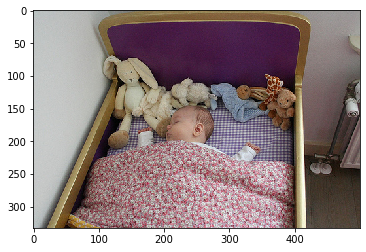

In [31]:
im_path = r'../images/cat.jpg'
im = Image.open(im_path)

imshow(im)

transform = transforms.Compose([
    transforms.Resize((256,256)),
   transforms.ToTensor()
])

im_input = transform(im)
h_input = im_input.numpy().reshape(-1).astype(np.float32)
fp = open('img.txt', 'w')
np.savetxt(fp, h_input, '%f')
fp.close()

## Empty numpy arrays to store outputs

In [4]:

h_conv0_out = np.empty(16*256*256).astype(np.float32)
h_bn0_out = np.empty(16*256*256).astype(np.float32)
h_pool1_out = np.empty(16*128*128).astype(np.float32)

h_conv2_out = np.empty(32*128*128).astype(np.float32)
h_bn2_out = np.empty(32*128*128).astype(np.float32)
h_pool3_out = np.empty(32*64*64).astype(np.float32)

h_conv4_out = np.empty(64*64*64).astype(np.float32)
h_bn4_out = np.empty(64*64*64).astype(np.float32)
h_pool5_out = np.empty(64*32*32).astype(np.float32)

h_conv6_out = np.empty(128*32*32).astype(np.float32)
h_bn6_out = np.empty(128*32*32).astype(np.float32)
h_pool7_out = np.empty(128*16*16).astype(np.float32)

h_conv8_out = np.empty(256*16*16).astype(np.float32)
h_bn8_out = np.empty(256*16*16).astype(np.float32)
h_pool9_out = np.empty(256*8*8).astype(np.float32)

h_conv10_out = np.empty(512*8*8).astype(np.float32)
h_bn10_out = np.empty(512*8*8).astype(np.float32)
h_pool11_out = np.empty(512*4*4).astype(np.float32)

h_conv12_out = np.empty(1024*4*4).astype(np.float32)
h_bn12_out = np.empty(1024*4*4).astype(np.float32)
h_pool13_out = np.empty(1024*1*1).astype(np.float32)

h_conv14_out = np.empty(1*1000).astype(np.float32)
h_bn14_out = np.empty(1*1000).astype(np.float32)

## Create the Context and Command Queue

In [5]:
context = cl.create_some_context()
deviceinfo.output_device_info(context.devices[0])
queue = cl.CommandQueue(context)


Device is GeForce MX250GPU from NVIDIA Corporation with a max of 3 compute units


## Create Data Buffers 

In [6]:
d_sample = cl.Buffer(context, cl.mem_flags.READ_ONLY | cl.mem_flags.COPY_HOST_PTR, hostbuf = h_input)

d_conv0_weights = cl.Buffer(context, cl.mem_flags.READ_ONLY | cl.mem_flags.COPY_HOST_PTR, hostbuf = conv0_weights)
d_conv0_out = cl.Buffer(context, cl.mem_flags.WRITE_ONLY, h_conv0_out.nbytes)
d_bn0_weights = cl.Buffer(context, cl.mem_flags.READ_ONLY | cl.mem_flags.COPY_HOST_PTR, hostbuf = bn0_weights)
d_bn0_biases = cl.Buffer(context, cl.mem_flags.READ_ONLY | cl.mem_flags.COPY_HOST_PTR, hostbuf = bn0_biases)
d_bn0_mean = cl.Buffer(context, cl.mem_flags.READ_ONLY | cl.mem_flags.COPY_HOST_PTR, hostbuf = bn0_mean)
d_bn0_var = cl.Buffer(context, cl.mem_flags.READ_ONLY | cl.mem_flags.COPY_HOST_PTR, hostbuf = bn0_var)
d_bn0_out = cl.Buffer(context, cl.mem_flags.WRITE_ONLY, h_bn0_out.nbytes)
d_pool1_out = cl.Buffer(context, cl.mem_flags.WRITE_ONLY, h_pool1_out.nbytes)

d_conv2_weights = cl.Buffer(context, cl.mem_flags.READ_ONLY | cl.mem_flags.COPY_HOST_PTR, hostbuf = conv2_weights)
d_conv2_out = cl.Buffer(context, cl.mem_flags.WRITE_ONLY, h_conv2_out.nbytes)
d_bn2_weights = cl.Buffer(context, cl.mem_flags.READ_ONLY | cl.mem_flags.COPY_HOST_PTR, hostbuf = bn2_weights)
d_bn2_biases = cl.Buffer(context, cl.mem_flags.READ_ONLY | cl.mem_flags.COPY_HOST_PTR, hostbuf = bn2_biases)
d_bn2_mean = cl.Buffer(context, cl.mem_flags.READ_ONLY | cl.mem_flags.COPY_HOST_PTR, hostbuf = bn2_mean)
d_bn2_var = cl.Buffer(context, cl.mem_flags.READ_ONLY | cl.mem_flags.COPY_HOST_PTR, hostbuf = bn2_var)
d_bn2_out = cl.Buffer(context, cl.mem_flags.WRITE_ONLY, h_bn2_out.nbytes)
d_pool3_out = cl.Buffer(context, cl.mem_flags.WRITE_ONLY, h_pool3_out.nbytes)

d_conv4_weights = cl.Buffer(context, cl.mem_flags.READ_ONLY | cl.mem_flags.COPY_HOST_PTR, hostbuf = conv4_weights)
d_conv4_out = cl.Buffer(context, cl.mem_flags.WRITE_ONLY, h_conv4_out.nbytes)
d_bn4_weights = cl.Buffer(context, cl.mem_flags.READ_ONLY | cl.mem_flags.COPY_HOST_PTR, hostbuf = bn4_weights)
d_bn4_biases = cl.Buffer(context, cl.mem_flags.READ_ONLY | cl.mem_flags.COPY_HOST_PTR, hostbuf = bn4_biases)
d_bn4_mean = cl.Buffer(context, cl.mem_flags.READ_ONLY | cl.mem_flags.COPY_HOST_PTR, hostbuf = bn4_mean)
d_bn4_var = cl.Buffer(context, cl.mem_flags.READ_ONLY | cl.mem_flags.COPY_HOST_PTR, hostbuf = bn4_var)
d_bn4_out = cl.Buffer(context, cl.mem_flags.WRITE_ONLY, h_bn4_out.nbytes)
d_pool5_out = cl.Buffer(context, cl.mem_flags.WRITE_ONLY, h_pool5_out.nbytes)

d_conv6_weights = cl.Buffer(context, cl.mem_flags.READ_ONLY | cl.mem_flags.COPY_HOST_PTR, hostbuf = conv6_weights)
d_conv6_out = cl.Buffer(context, cl.mem_flags.WRITE_ONLY, h_conv6_out.nbytes)
d_bn6_weights = cl.Buffer(context, cl.mem_flags.READ_ONLY | cl.mem_flags.COPY_HOST_PTR, hostbuf = bn6_weights)
d_bn6_biases = cl.Buffer(context, cl.mem_flags.READ_ONLY | cl.mem_flags.COPY_HOST_PTR, hostbuf = bn6_biases)
d_bn6_mean = cl.Buffer(context, cl.mem_flags.READ_ONLY | cl.mem_flags.COPY_HOST_PTR, hostbuf = bn6_mean)
d_bn6_var = cl.Buffer(context, cl.mem_flags.READ_ONLY | cl.mem_flags.COPY_HOST_PTR, hostbuf = bn6_var)
d_bn6_out = cl.Buffer(context, cl.mem_flags.WRITE_ONLY, h_bn6_out.nbytes)
d_pool7_out = cl.Buffer(context, cl.mem_flags.WRITE_ONLY, h_pool7_out.nbytes)

d_conv8_weights = cl.Buffer(context, cl.mem_flags.READ_ONLY | cl.mem_flags.COPY_HOST_PTR, hostbuf = conv8_weights)
d_conv8_out = cl.Buffer(context, cl.mem_flags.WRITE_ONLY, h_conv8_out.nbytes)
d_bn8_weights = cl.Buffer(context, cl.mem_flags.READ_ONLY | cl.mem_flags.COPY_HOST_PTR, hostbuf = bn8_weights)
d_bn8_biases = cl.Buffer(context, cl.mem_flags.READ_ONLY | cl.mem_flags.COPY_HOST_PTR, hostbuf = bn8_biases)
d_bn8_mean = cl.Buffer(context, cl.mem_flags.READ_ONLY | cl.mem_flags.COPY_HOST_PTR, hostbuf = bn8_mean)
d_bn8_var = cl.Buffer(context, cl.mem_flags.READ_ONLY | cl.mem_flags.COPY_HOST_PTR, hostbuf = bn8_var)
d_bn8_out = cl.Buffer(context, cl.mem_flags.WRITE_ONLY, h_bn8_out.nbytes)
d_pool9_out = cl.Buffer(context, cl.mem_flags.WRITE_ONLY, h_pool9_out.nbytes)

d_conv10_weights = cl.Buffer(context, cl.mem_flags.READ_ONLY | cl.mem_flags.COPY_HOST_PTR, hostbuf = conv10_weights)
d_conv10_out = cl.Buffer(context, cl.mem_flags.WRITE_ONLY, h_conv10_out.nbytes)
d_bn10_weights = cl.Buffer(context, cl.mem_flags.READ_ONLY | cl.mem_flags.COPY_HOST_PTR, hostbuf = bn10_weights)
d_bn10_biases = cl.Buffer(context, cl.mem_flags.READ_ONLY | cl.mem_flags.COPY_HOST_PTR, hostbuf = bn10_biases)
d_bn10_mean = cl.Buffer(context, cl.mem_flags.READ_ONLY | cl.mem_flags.COPY_HOST_PTR, hostbuf = bn10_mean)
d_bn10_var = cl.Buffer(context, cl.mem_flags.READ_ONLY | cl.mem_flags.COPY_HOST_PTR, hostbuf = bn10_var)
d_bn10_out = cl.Buffer(context, cl.mem_flags.WRITE_ONLY, h_bn10_out.nbytes)
d_pool11_out = cl.Buffer(context, cl.mem_flags.WRITE_ONLY, h_pool11_out.nbytes)

d_conv12_weights = cl.Buffer(context, cl.mem_flags.READ_ONLY | cl.mem_flags.COPY_HOST_PTR, hostbuf = conv12_weights)
d_conv12_out = cl.Buffer(context, cl.mem_flags.WRITE_ONLY, h_conv12_out.nbytes)
d_bn12_weights = cl.Buffer(context, cl.mem_flags.READ_ONLY | cl.mem_flags.COPY_HOST_PTR, hostbuf = bn12_weights)
d_bn12_biases = cl.Buffer(context, cl.mem_flags.READ_ONLY | cl.mem_flags.COPY_HOST_PTR, hostbuf = bn12_biases)
d_bn12_mean = cl.Buffer(context, cl.mem_flags.READ_ONLY | cl.mem_flags.COPY_HOST_PTR, hostbuf = bn12_mean)
d_bn12_var = cl.Buffer(context, cl.mem_flags.READ_ONLY | cl.mem_flags.COPY_HOST_PTR, hostbuf = bn12_var)
d_bn12_out = cl.Buffer(context, cl.mem_flags.WRITE_ONLY, h_bn12_out.nbytes)
d_pool13_out = cl.Buffer(context, cl.mem_flags.WRITE_ONLY, h_pool13_out.nbytes)

d_conv14_weights = cl.Buffer(context, cl.mem_flags.READ_ONLY | cl.mem_flags.COPY_HOST_PTR, hostbuf = conv14_weights)
d_conv14_out = cl.Buffer(context, cl.mem_flags.WRITE_ONLY, h_conv14_out.nbytes)
d_bn14_weights = cl.Buffer(context, cl.mem_flags.READ_ONLY | cl.mem_flags.COPY_HOST_PTR, hostbuf = bn14_weights)
d_bn14_biases = cl.Buffer(context, cl.mem_flags.READ_ONLY | cl.mem_flags.COPY_HOST_PTR, hostbuf = bn14_biases)
d_bn14_mean = cl.Buffer(context, cl.mem_flags.READ_ONLY | cl.mem_flags.COPY_HOST_PTR, hostbuf = bn14_mean)
d_bn14_var = cl.Buffer(context, cl.mem_flags.READ_ONLY | cl.mem_flags.COPY_HOST_PTR, hostbuf = bn14_var)
d_bn14_out = cl.Buffer(context, cl.mem_flags.WRITE_ONLY, h_bn14_out.nbytes)

## Build the kernel program

In [7]:
kernelsource = open("darknet.cl").read()
program = cl.Program(context, kernelsource).build()

## Set the datatypes of the kernels

In [8]:
conv_cl = program.conv
conv_cl.set_scalar_arg_dtypes([None, None, None, np.int32, np.int32, np.int32, np.int32, np.int32, np.int32, np.int32, np.int32])

bn_cl = program.batchnorm
bn_cl.set_scalar_arg_dtypes([None, None, None, None, None, None, np.int32 , np.float32, np.int32])

maxpool_cl = program.maxpool
maxpool_cl.set_scalar_arg_dtypes([None, None, np.int32, np.int32, np.int32, np.int32, np.int32])

conv1x1_cl = program.conv1x1
conv1x1_cl.set_scalar_arg_dtypes([None, None, None,np.int32, np.int32, np.int32, np.int32, np.int32])

## Darknet Reference Model

<img src="../model_architecture.jpg">



In [9]:
t = time()

conv_cl(queue,(256*256,16), (8,8), d_sample, d_conv0_weights, d_conv0_out, 32, 3, 1, 1, 3, 256, 256*256, 256)
bn_cl(queue, (16,256*256), None, d_conv0_out, d_bn0_weights, d_bn0_biases, d_bn0_mean, d_bn0_var, d_bn0_out, 256*256, 0.00001, 1)
maxpool_cl(queue, (16,), None, d_bn0_out, d_pool1_out, 256, 2, 2, 128, 0)

conv_cl(queue,(128*128,32), (8,8), d_pool1_out, d_conv2_weights, d_conv2_out, 16*3*3, 3, 1, 1, 16, 128, 128*128, 128)
bn_cl(queue, (32,128*128), None, d_conv2_out, d_bn2_weights, d_bn2_biases, d_bn2_mean, d_bn2_var, d_bn2_out, 128*128, 0.00001, 1)
maxpool_cl(queue, (32,), None, d_bn2_out, d_pool3_out, 128, 2, 2, 64, 0)

conv_cl(queue,(64*64,64), (8,8), d_pool3_out, d_conv4_weights, d_conv4_out, 32*3*3, 3, 1, 1, 32, 64, 64*64, 64)
bn_cl(queue, (64,64*64), None, d_conv4_out, d_bn4_weights, d_bn4_biases, d_bn4_mean, d_bn4_var, d_bn4_out, 64*64, 0.00001, 1)
maxpool_cl(queue, (64,), None, d_bn4_out, d_pool5_out, 64, 2, 2, 32, 0)

conv_cl(queue,(32*32,128), (8,8), d_pool5_out, d_conv6_weights, d_conv6_out, 64*3*3, 3, 1, 1, 64, 32, 32*32, 32)
bn_cl(queue, (128,32*32), None, d_conv6_out, d_bn6_weights, d_bn6_biases, d_bn6_mean, d_bn6_var, d_bn6_out, 32*32, 0.00001, 1)
maxpool_cl(queue, (128,), None, d_bn6_out, d_pool7_out, 32, 2, 2, 16, 0)

conv_cl(queue,(16*16,256), (8,8), d_pool7_out, d_conv8_weights, d_conv8_out, 128*3*3, 3, 1, 1, 128, 16, 16*16, 16)
bn_cl(queue, (256,16*16), None, d_conv8_out, d_bn8_weights, d_bn8_biases, d_bn8_mean, d_bn8_var, d_bn8_out, 16*16, 0.00001, 1)
maxpool_cl(queue, (256,), None, d_bn8_out, d_pool9_out, 16, 2, 2, 8, 0)

conv_cl(queue,(8*8,512), (8,8), d_pool9_out, d_conv10_weights, d_conv10_out, 256*3*3, 3, 1, 1, 256, 8, 8*8, 8)
bn_cl(queue, (512,8*8), None, d_conv10_out, d_bn10_weights, d_bn10_biases, d_bn10_mean, d_bn10_var, d_bn10_out, 8*8, 0.00001, 1)
maxpool_cl(queue, (512,), None, d_bn10_out, d_pool11_out, 8, 2, 2, 4, 0)

conv_cl(queue,(4*4,1024), (8,8), d_pool11_out, d_conv12_weights, d_conv12_out, 512*3*3, 3, 1, 1, 512, 4, 4*4, 4)
bn_cl(queue, (1024,4*4), None, d_conv12_out, d_bn12_weights, d_bn12_biases, d_bn12_mean, d_bn12_var, d_bn12_out, 4*4, 0.00001, 1)
maxpool_cl(queue, (1024,), None, d_bn12_out, d_pool13_out, 4, 4, 1, 1, 1)

conv1x1_cl(queue,(1000,1), None, d_pool13_out, d_conv14_weights, d_conv14_out, 1024, 1, 0, 1, 1)
bn_cl(queue, (1000,1*1), None, d_conv14_out, d_bn14_weights, d_bn14_biases, d_bn14_mean, d_bn14_var, d_bn14_out, 1*1, 0.00000, 0)

t = time() - t
print("Model Execution Time: {:.3f} ms".format(t*1000));

Model Execution Time: 63.969 ms


In [10]:
cl.enqueue_copy(queue, h_bn14_out, d_bn14_out)
output_tensor = torch.from_numpy(h_bn14_out)
output = torch.nn.functional.softmax(output_tensor, dim=0)
accuracy, index = torch.topk(output,5)

In [11]:
fp = open('../imagenet_labels.list','r')
lines = fp.readlines()
arr_lines = [line.strip() for line in lines[:1000]]
print("Results:\n")
for acc, i in zip(accuracy, index):   
    label = arr_lines[int(i)]
    print("CLASS : {:25}  ACCURACY : {:.3f}%".format(label,acc*100)) 

Results:

CLASS : flatworm                   ACCURACY : 21.257%
CLASS : eel                        ACCURACY : 18.896%
CLASS : puffer                     ACCURACY : 14.740%
CLASS : sea snake                  ACCURACY : 8.939%
CLASS : spotted salamander         ACCURACY : 8.545%


In [51]:
h_bn14_out

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

In [78]:
fp = open('pool13.txt', 'w')
np.savetxt(fp, h_pool13_out, '%f')
fp.close()